In [1]:
# Add the root path of the dmrgpy library
import os ; import sys ; sys.path.append(os.getcwd()+'/../src')

# Non-local correlator
Let us compare the non-local correlator of a spin model with Julia and C++ backends

C++/Julia 0.6845451113627784


Text(0, 0.5, 'Non-local correlator')

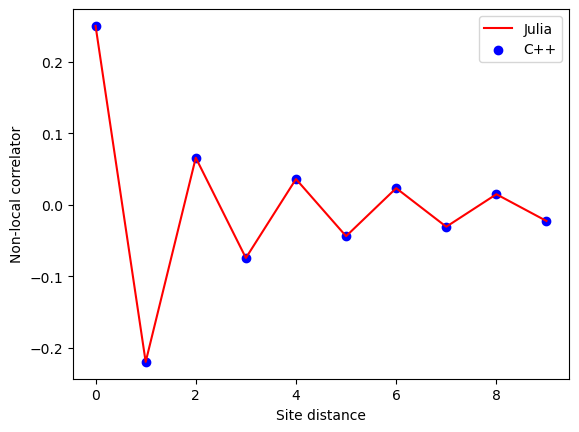

In [5]:
import numpy as np
from dmrgpy import spinchain
import matplotlib.pyplot as plt

def compute(MPSmode="julia"):

####################################
### Create the spin chain object ###
####################################
    n = 10 # total number of spins
    spins = ["S=1/2" for i in range(n)] # list with the different spins 
    sc = spinchain.Spin_Chain(spins) # create the spin chain object
    if MPSmode=="julia": sc.setup_julia() # use Julia
    if MPSmode=="C++": sc.setup_cpp() # use C++

##############################
### Create the hamiltonian ###
##############################
    h = 0 
    for i in range(n-1):
        h = h + sc.Sx[i]*sc.Sx[i+1]
        h = h + sc.Sy[i]*sc.Sy[i+1]
        h = h + sc.Sz[i]*sc.Sz[i+1]

#    h = h + 0.1*sc.Sz[0]
    sc.set_hamiltonian(h)
    mz = [sc.vev(sc.Sx[0]*sc.Sx[i]) for i in range(n)]
#    mx,my,mz = sc.get_magnetization() # use DMRG
    return mz

import time

import contextlib
t0 = time.time()
mzj = compute(MPSmode="julia") # use Julia
t1 = time.time()
mzc = compute(MPSmode="C++") # use C++
t2 = time.time()

print("C++/Julia",(t2-t1)/(t1-t0))

# plot the results
plt.plot(range(len(mzj)),mzj,label="Julia",c="red")
plt.scatter(range(len(mzc)),mzc,label="C++",c="blue")
plt.legend()
plt.xlabel("Site distance")
plt.ylabel("Non-local correlator")



# Time required to apply an MPO to an MPS
Let us compare the time in MPS MPO operations

In [7]:

import numpy as np
from dmrgpy import spinchain
import matplotlib.pyplot as plt

def compute(MPSmode="julia"):
    n = 20 # total number of spins
    spins = ["S=1/2" for i in range(n)] # list with the different spins 
    sc = spinchain.Spin_Chain(spins) # create the spin chain object
    if MPSmode=="julia": sc.setup_julia() # use Julia
    if MPSmode=="C++": sc.setup_cpp() # use C++
    wf0 = sc.random_state()
    A = (sc.Sx[0]*sc.Sx[n//2]) # some non-local operator
    A = sc.toMPO(A) # convert to a (fast) MPO
    num = 100 # number of operations
    for i in range(num):
        wf0 = A*wf0 # MPO times MPS several times
    return wf0

import time

t0 = time.time()
mzj = compute(MPSmode="julia") # use Julia
t1 = time.time()
mzc = compute(MPSmode="C++") # use C++
t2 = time.time()

print("C++/Julia",(t2-t1)/(t1-t0))


C++/Julia 2.643669150629768


# Bond dimension convergence
Let us now look at the bond dimension converge with Julia and C++

C++/Julia 0.8007367236231616


Text(0, 0.5, 'Energy per site')

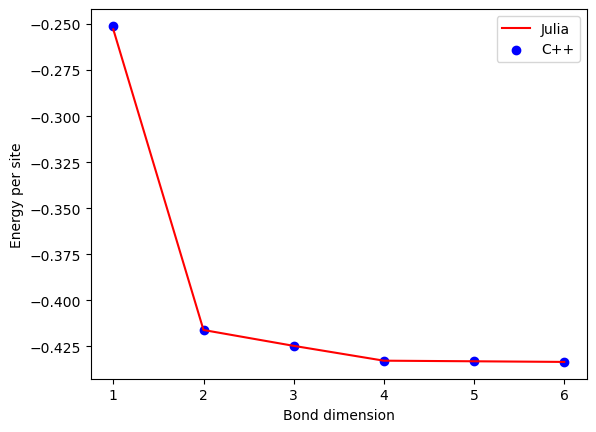

In [9]:
def compute_energy(MPSmode="julia",maxm=10):

####################################
### Create the spin chain object ###
####################################
    n = 20 # total number of spins
    spins = ["S=1/2" for i in range(n)] # list with the different spins 
    sc = spinchain.Spin_Chain(spins) # create the spin chain object
    if MPSmode=="julia": sc.setup_julia() # use Julia
    if MPSmode=="C++": sc.setup_cpp() # use C++
    sc.maxm = maxm

##############################
### Create the hamiltonian ###
##############################
    h = 0 
    for i in range(n-1):
        h = h + sc.Sx[i]*sc.Sx[i+1]
        h = h + sc.Sy[i]*sc.Sy[i+1]
        h = h + sc.Sz[i]*sc.Sz[i+1]

#    h = h + 0.1*sc.Sz[0]
    sc.set_hamiltonian(h)
    return sc.gs_energy()/n


import time

ms = range(1,7)

t0 = time.time()
esj = [compute_energy(MPSmode="julia",maxm=m) for m in ms] # use Julia
t1 = time.time()
esc = [compute_energy(MPSmode="C++",maxm=m) for m in ms] # use Julia
t2 = time.time()

# and plot the results
print("C++/Julia",(t2-t1)/(t1-t0))

# plot the results
plt.plot(ms,esj,label="Julia",c="red")
plt.scatter(ms,esc,label="C++",c="blue")
plt.legend()
plt.xlabel("Bond dimension")
plt.ylabel("Energy per site")
